# Contexte
Vous êtes en train de préparer le reporting mensuel à présenter chaque fin de mois à votre responsable. La présentation devra comprendre certains graphiques clés : vous allez donc devoir utiliser vos compétences en data visualisation pour produire les différentes visualisations attendues.

# Consignes
Les graphiques à produire sont donc :

- la proportion de chaque type de prêt ;

- le bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers ;

- la distribution des bénéfices réalisés ;

- le bénéfice mensuel total réalisé par agence.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pour réaliser les différents graphiques, nous utiliserons le fichier de prêt enrichi ([c.f. exercice précédent](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P2/P2C3%20-%20Filtrez%20les%20donn%C3%A9es%20du%20data%20frame%20-%20correction.ipynb)) que vous trouverez [à cette adresse](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv) :

In [224]:
# traitement réalisés précédemment
prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv')

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


## 1-proportion de prêt par type
Ici, nous allons d'abord agreger notre variable type et ensuite utiliser soit le diagramme circulaire ou à barre pour la visualisation

In [225]:
df1=prets.groupby(prets["type"]).size().reset_index()

df1.rename(columns={0:'total'},inplace=True)
df1.head()

,type,total
0,automobile,16
1,immobilier,228


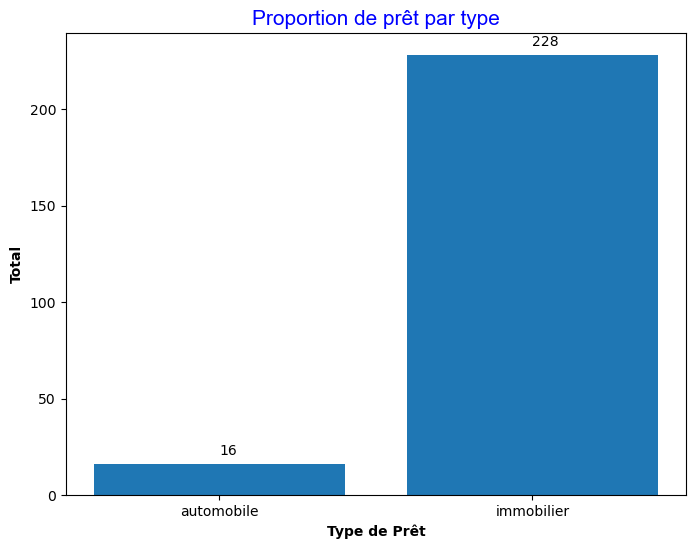

In [248]:
#Diagramme à Barre
plt.figure(figsize=(8,6))
plt.bar(df1['type'],df1["total"])
plt.xlabel("Type de Prêt",fontweight="bold")
plt.ylabel("Total",fontweight="bold")
plt.title("Proportion de prêt par type",color='blue',font="Arial",fontsize=15)
total=df1["total"].tolist()

for i in range(2):
    plt.text(i,total[i]+5,round(total[i],2))

Text(0.5, 1.0, 'Proportion de prêt par type')

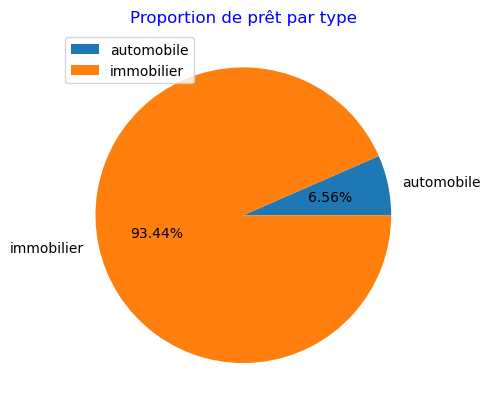

In [230]:
#Diagramme Circulaire
plt.pie(labels=df1["type"],x=df1["total"],autopct='%.2f%%')
plt.legend(loc="upper left")
plt.title("Proportion de prêt par type",color='blue')

## 2. bénéfice mensuel réalisé en fonction du revenu du client pour les prêts automobile
ici, nous allons appliquer le nuages des points pour mettre en évidence la rélation entre les 2 variable

Text(0.5, 1.0, 'Benefice Mensuel réalisé en fonction du revenu du client pour les prêt automobile')

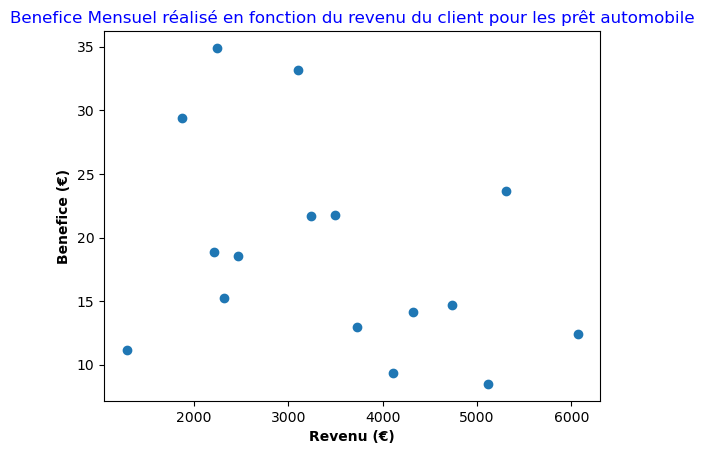

In [220]:
df1=prets.loc[prets['type']=="automobile",:]
plt.scatter(df1["revenu"],df1['benefices'])
plt.xlabel("Revenu (€)",fontweight="bold")
plt.ylabel("Benefice (€)",fontweight="bold")
plt.title("Benefice Mensuel réalisé en fonction du revenu du client pour les prêt automobile",color='blue')

## 2.1 bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immbolier

Text(0.5, 1.0, 'Benefice Mensuel réalisé en fonction du revenu du client pour les prêt immobilier')

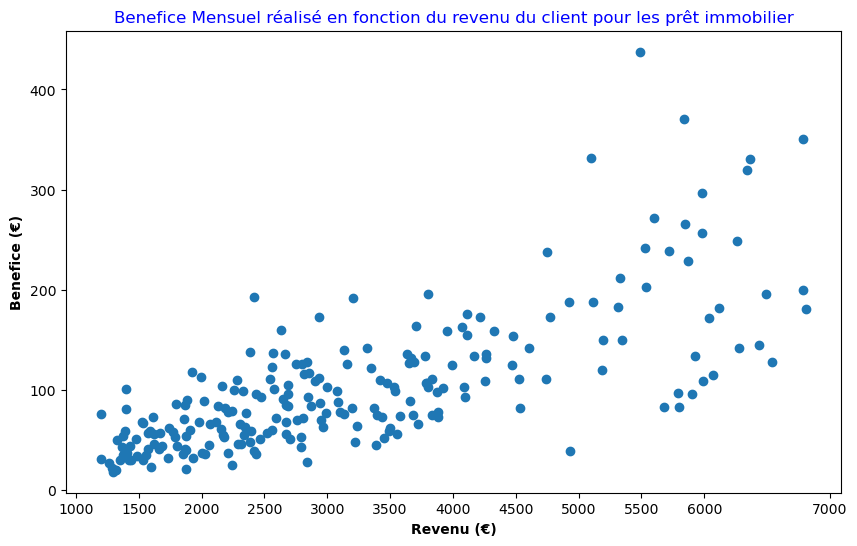

In [217]:

plt.figure(figsize=(10,6))
df1=prets.loc[prets['type']=="immobilier",:]
plt.scatter(df1["revenu"],df1['benefices'])
plt.xlabel("Revenu (€)",fontweight="bold")
plt.ylabel("Benefice (€)",fontweight="bold")
plt.xticks([1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,7000])

plt.title("Benefice Mensuel réalisé en fonction du revenu du client pour les prêt immobilier",color='blue')

## 3. La distribution des bénéfices réalisés

Text(0, 0.5, 'Fréquences')

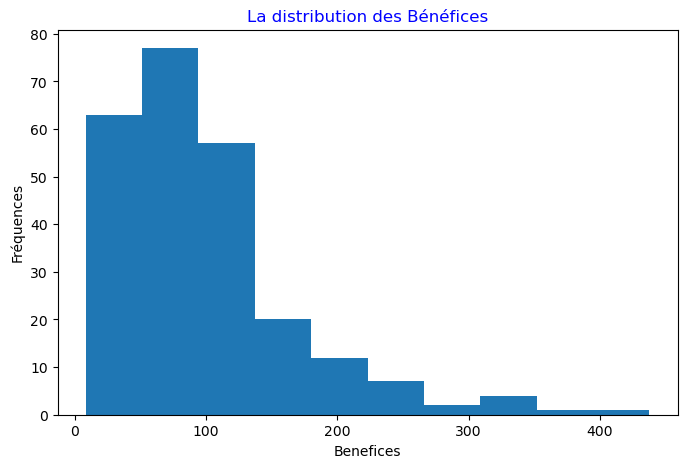

In [159]:
plt.figure(figsize=(8,5))
plt.hist(prets["benefices"])
plt.title("La distribution des Bénéfices",color="blue")
plt.xlabel("Benefices")
plt.ylabel("Fréquences")


## 4. bénéfice mensuel total réalisé  par agence

In [49]:
benefice_ville = prets.groupby('ville')['benefices'].sum()
benefice_ville=benefice_ville.reset_index()
benefice_ville.head()

,ville,benefices
0,BORDEAUX,1681.32
1,LYON,3014.80
2,MARSEILLE,4395.91
3,NICE,2682.75
4,PARIS,10016.35


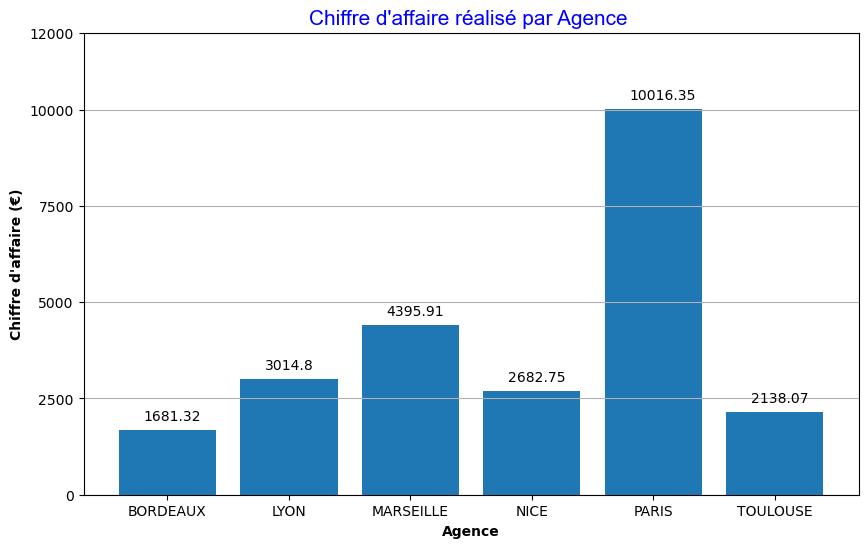

In [203]:
plt.figure(figsize=(10,6))
plt.bar(x=benefice_ville['ville'], height=benefice_ville['benefices'])
plt.title("Chiffre d'affaire réalisé par Agence ",font="arial",fontsize='15',color="blue")
plt.xlabel("Agence",fontweight="bold")
plt.ylabel("Chiffre d'affaire (€)",fontweight="bold")

plt.grid(axis='y')
plt.ylim(0,12000)
plt.yticks([0,2500,5000,7500,10000,12000])
ca=benefice_ville["benefices"].tolist()
for i in range(6):
    plt.text(i-0.2,ca[i]+250,round(ca[i],2))
    
plt.show()

# Personnalisons nos graphiques avec Matplotlib

Les bénéfices mensuels de l’année 2021 viennent de sortir par type de prêt au niveau de l’agence où vous travaillez. Dans le cadre du reporting mensuel, il vous est demandé de réaliser un graphique spécifique représentant l’évolution du bénéfices mensuels sur l’année, par type de prêt. On a les données suivantes à disposition :

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CA = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/CA.csv')
CA['date'] = pd.to_datetime(CA['date'])
CA.head

<bound method NDFrame.head of          date  immobilier  automobile  consommation
0  2021-01-01       10439        5096          3808
1  2021-02-01       11266        5146          5838
2  2021-03-01       11315        5276          5601
3  2021-04-01       11456        5067          3639
4  2021-05-01       10816        4937          5273
5  2021-06-01       11988        5026          4133
6  2021-07-01       11267        5228          5253
7  2021-08-01       10179        5462          4822
8  2021-09-01       10627        4698          5099
9  2021-10-01       10082        5825          2002
10 2021-11-01       11087        4242          2329
11 2021-12-01       10913        5156          2245>

L'objectif est d'obtenir le graphique suivant : 
![image-3.png](https://github.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P3/img.png?raw=true)

Pour expliciter rapidement les différents aspects qui avaient été réalisés :
- une courbe a été tracée pour chaque type de prêt, de dimension 3
- la légende est apparente
- le titre de l'axe des ordonnées a été ajouté
- la police des graduations (ticks) a été fixée à 11
- la police du titre a été fixée à 14
- le quadrillage apparait en gris, avec une taille de 0.5

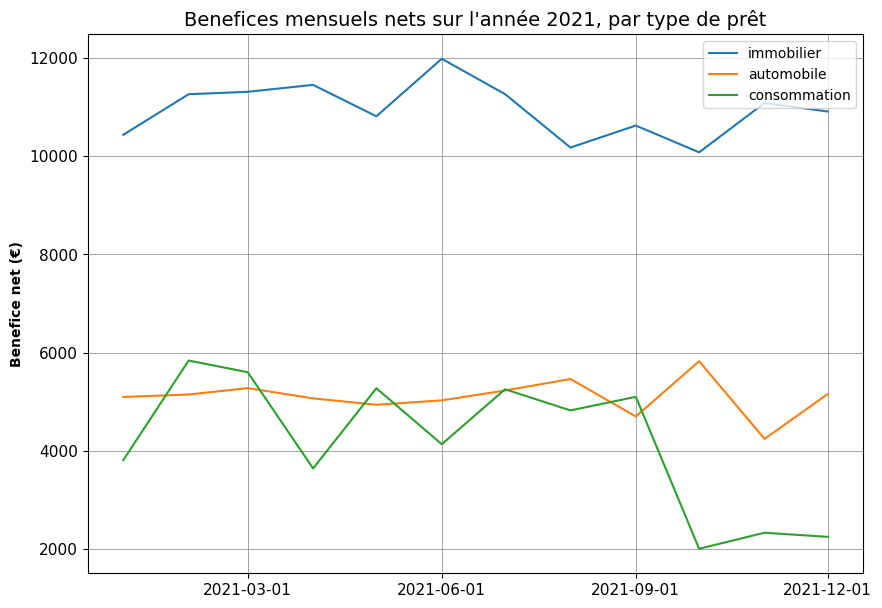

In [255]:
date=CA["date"].tolist()
plt.figure(figsize=(10,7))
for agence in CA.iloc[:,1:]:
    plt.plot(CA["date"],CA[agence],label=agence)
    plt.legend(loc='upper right')
plt.grid(color="gray",linewidth=0.5)
plt.ylabel("Benefice net (€)",fontweight="bold")
plt.title("Benefices mensuels nets sur l'année 2021, par type de prêt",fontsize=14)
plt.xticks(date[2::3],fontsize=11)
plt.yticks(fontsize=11)
plt.show()

thanks! 